In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# Label Mapping
labels = {'biodegradable': ['food waste', 'leaf waste', 'paper waste', 'wood waste'], 
          'non_biodegradable': ['ewaste', 'metal cans', 'plastic bags', 'plastic bottles']}

In [3]:
# Unpersists graph from file
with tf.gfile.FastGFile("./retrained_graph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

Instructions for updating:
Use tf.gfile.GFile.


File Name:  00000095.JPEG


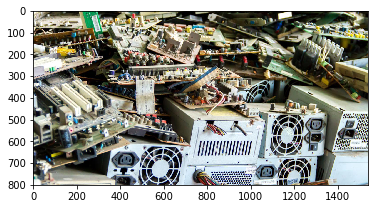

Top Label:  non_biodegradable 
Actual Label:  ewaste 
Score:  0.99951994



File Name:  00000181.JPEG


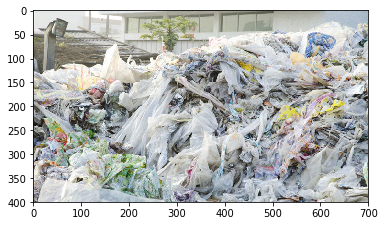

Top Label:  non_biodegradable 
Actual Label:  plastic bags 
Score:  0.9995778



File Name:  00000174.JPEG


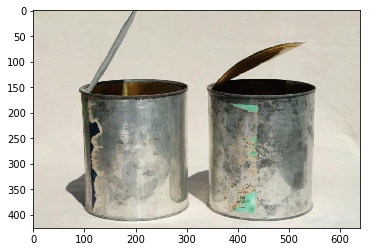

Top Label:  non_biodegradable 
Actual Label:  metal cans 
Score:  0.8361422



File Name:  00000066.JPEG


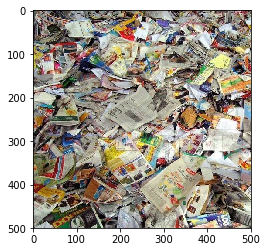

Top Label:  biodegradable 
Actual Label:  paper waste 
Score:  0.97910756



File Name:  629303c0-a89e-4f67-9ac8-aa769cf3a163___RS_LB 3945.JPEG


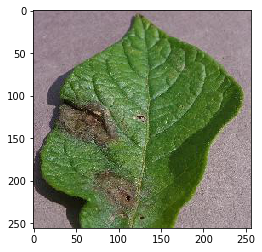

Top Label:  biodegradable 
Actual Label:  leaf waste 
Score:  0.9995994



File Name:  00000092.JPEG


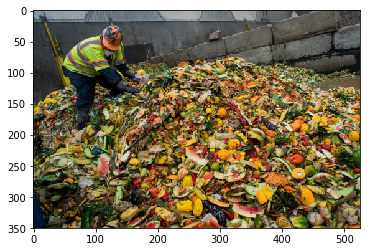

Top Label:  biodegradable 
Actual Label:  paper waste 
Score:  0.7350731



File Name:  00000047.JPEG


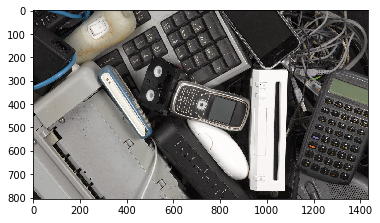

Top Label:  non_biodegradable 
Actual Label:  ewaste 
Score:  0.97405744



File Name:  00000064.JPEG


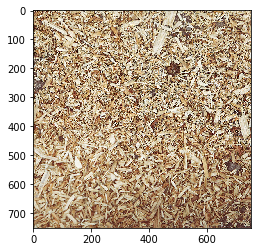

Top Label:  biodegradable 
Actual Label:  wood waste 
Score:  0.9955929



File Name:  2565077d-44d3-4213-82c2-bf5ae9a64368___RS_LB 3295.JPEG


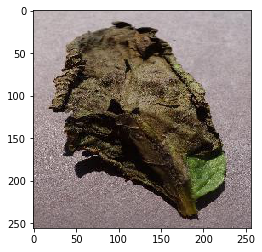

Top Label:  biodegradable 
Actual Label:  leaf waste 
Score:  0.978388



File Name:  00000182.JPEG


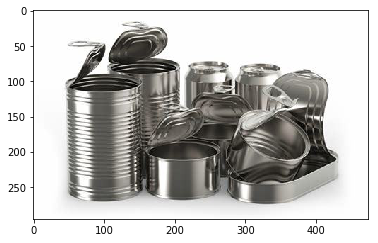

Top Label:  non_biodegradable 
Actual Label:  metal cans 
Score:  0.99980146



File Name:  00000019.JPEG


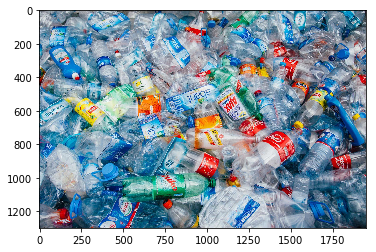

Top Label:  non_biodegradable 
Actual Label:  plastic bottles 
Score:  0.99845624



File Name:  00000297.JPEG


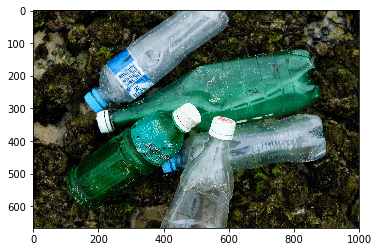

Top Label:  non_biodegradable 
Actual Label:  plastic bottles 
Score:  0.99733305



File Name:  00000192.JPEG


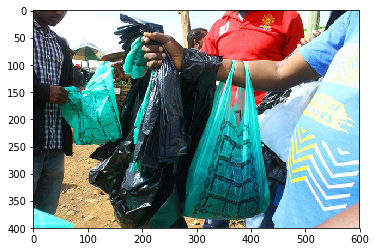

Top Label:  non_biodegradable 
Actual Label:  plastic bags 
Score:  0.9996511



File Name:  00000080.JPEG


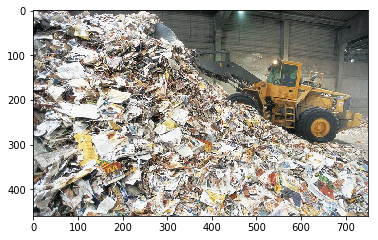

Top Label:  biodegradable 
Actual Label:  paper waste 
Score:  0.9073264



File Name:  00000184.JPEG


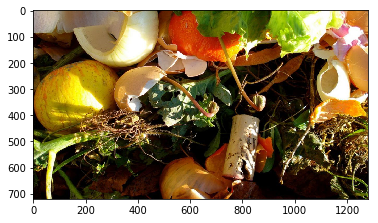

Top Label:  biodegradable 
Actual Label:  food waste 
Score:  0.9570708



File Name:  00000167.JPEG


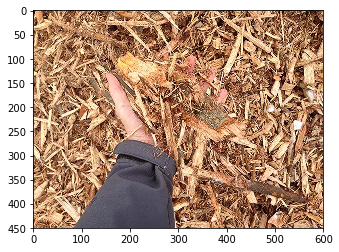

Top Label:  biodegradable 
Actual Label:  wood waste 
Score:  0.99885106





In [4]:
with tf.Session() as sess:
    
    # Plot Images
    for img in glob('./val/*'):
        fname = img.split('/')[2]
        print("File Name: ", fname)
        im = plt.imread(img)
        plt.imshow(im)
        plt.show()
        
        # Feed the image_data as input to the graph and get first prediction
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        # Read in the image_data
        image_data = tf.gfile.FastGFile(img, 'rb').read()

        # Loads label file, strips off carriage return
        label_lines = [line.rstrip() for line in tf.gfile.GFile("./retrained_labels.txt")]

        # Make Prediction
        predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]

        #print('%s (score = %.5f)' % (label_lines[top_k[0]], predictions[0][top_k[0]]))
        
        # Label Mapping
        for label, ex in labels.items():
            if label_lines[top_k[0]] in ex:
                print("Top Label: ", label,
                      "\nActual Label: ", str(label_lines[top_k[0]]),
                     "\nScore: ", predictions[0][top_k[0]])
        print('\n\n')